In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr, chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df1 = pd.read_csv('Dataset_1.csv')

In [4]:
df1.head()

,Patient_ID,Age,Gender,BMI,Smoking_History,Exercise_Frequency,Chronic_Illness,Colon_Cancer_Type
0,P1000,58,Male,24.72,Never,Rarely,NaN,Type A
1,P1001,71,Male,28.68,Current,Rarely,NaN,Type C
2,P1002,48,Male,NaN,Former,Occasionally,NaN,Type A
3,P1003,34,Female,39.88,Never,Occasionally,Hypertension,Type C
4,P1004,62,Female,21.87,Never,Occasionally,NaN,Type B


In [5]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1                
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter rows within the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Looking into dataset1 

In [6]:
df1.isna().sum()

Patient_ID              0
Age                     0
Gender                  0
BMI                    20
Smoking_History         0
Exercise_Frequency      0
Chronic_Illness       115
Colon_Cancer_Type       0
dtype: int64

In [7]:
df1['Chronic_Illness'].value_counts()

Chronic_Illness
Diabetes        40
Hypertension    32
Both            13
Name: count, dtype: int64

In [8]:
# since the chronics illness column shows contains diabetes , hypertenion and both , so nan values can be intrepreted as no chronic illness
df1['Chronic_Illness'].fillna('No Chronic Illness',inplace=True)

C:\Users\91976\AppData\Local\Temp\ipykernel_20104\4247731576.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Chronic_Illness'].fillna('No Chronic Illness',inplace=True)


In [9]:
mean_typea = df1[df1['Colon_Cancer_Type'] == 'Type A']['BMI'].mean()
print(mean_typea)
mean_typeb = df1[df1['Colon_Cancer_Type'] == 'Type B']['BMI'].mean()
print(mean_typeb)
mean_typec = df1[df1['Colon_Cancer_Type'] == 'Type C']['BMI'].mean()
print(mean_typec)

28.315730337078655
27.644509803921565
30.497749999999996


In [10]:
#since most of people in type c are on average in obese category it will be better to fill the nan with mean of type c only , similarly for type b and type a
df1['BMI'] = df1['BMI'].fillna(df1.groupby('Colon_Cancer_Type')['BMI'].transform('mean'))

<AxesSubplot:xlabel='Gender', ylabel='count'>

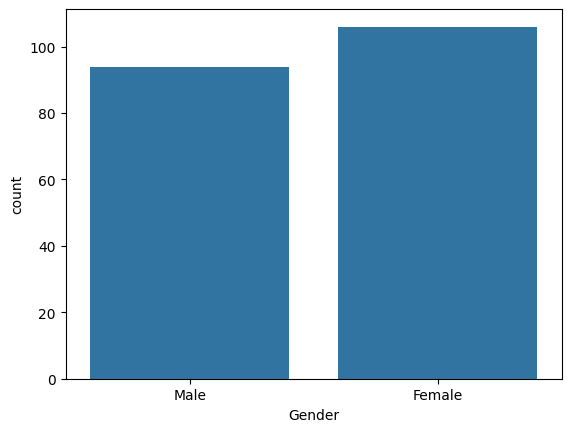

In [11]:
sns.countplot(x='Gender',data=df1)

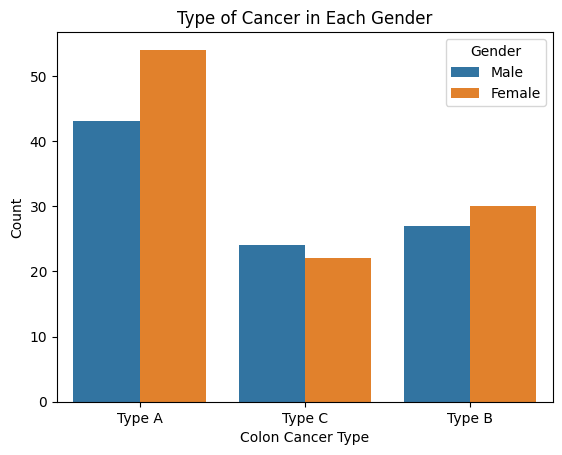

In [12]:
sns.countplot(x='Colon_Cancer_Type', hue='Gender', data=df1)
plt.title('Type of Cancer in Each Gender')
plt.xlabel('Colon Cancer Type')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()

<AxesSubplot:xlabel='Smoking_History', ylabel='count'>

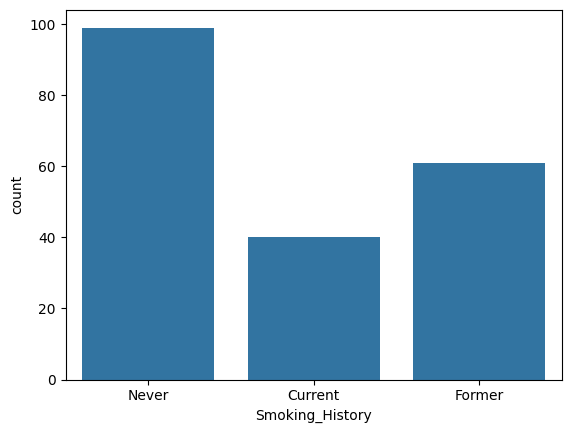

In [13]:
sns.countplot(x='Smoking_History',data=df1)

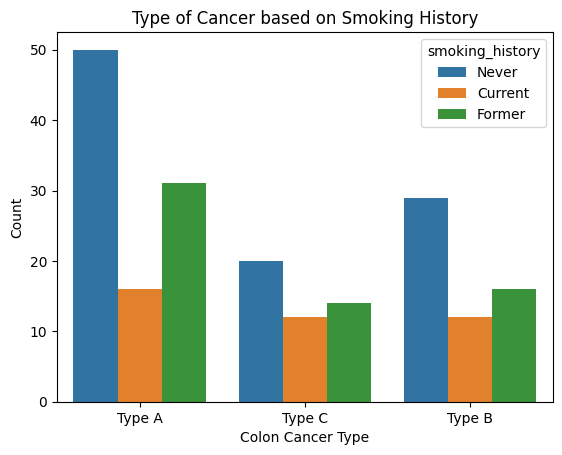

In [14]:
sns.countplot(x='Colon_Cancer_Type', hue='Smoking_History', data=df1)
plt.title('Type of Cancer based on Smoking History')
plt.xlabel('Colon Cancer Type')
plt.ylabel('Count')
plt.legend(title='smoking_history', loc='upper right')
plt.show()

<AxesSubplot:xlabel='Colon_Cancer_Type', ylabel='count'>

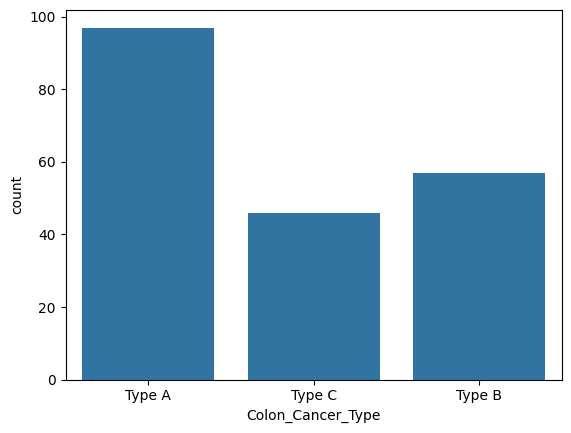

In [15]:
sns.countplot(x='Colon_Cancer_Type',data=df1)

<AxesSubplot:xlabel='Exercise_Frequency', ylabel='count'>

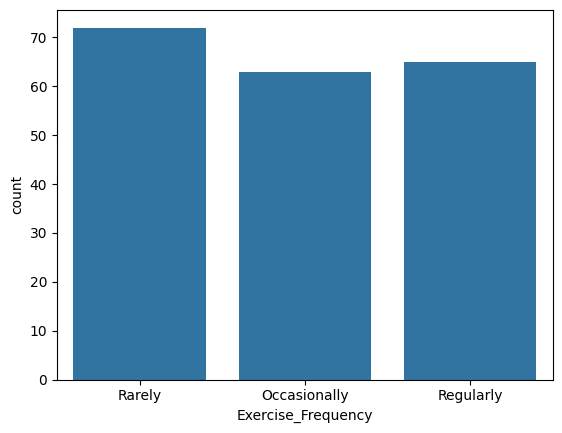

In [16]:
sns.countplot(x='Exercise_Frequency',data=df1)

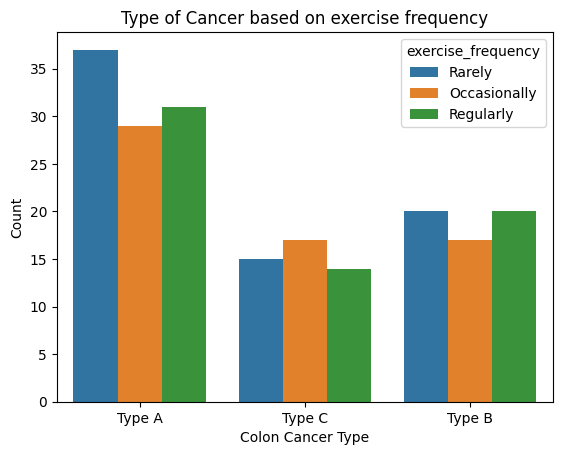

In [17]:
sns.countplot(x='Colon_Cancer_Type', hue='Exercise_Frequency', data=df1)
plt.title('Type of Cancer based on exercise frequency')
plt.xlabel('Colon Cancer Type')
plt.ylabel('Count')
plt.legend(title='exercise_frequency', loc='upper right')
plt.show()

<AxesSubplot:xlabel='Colon_Cancer_Type', ylabel='BMI'>

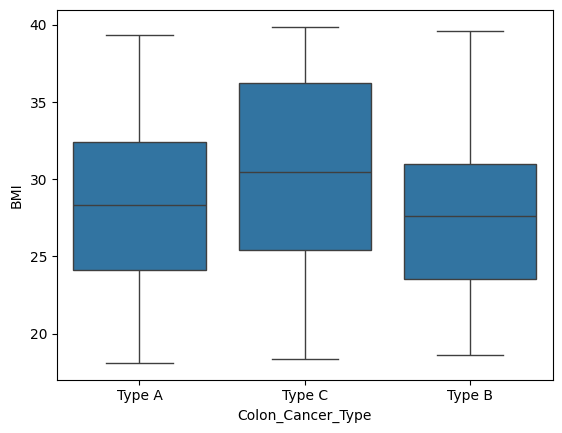

In [18]:
sns.boxplot(x='Colon_Cancer_Type',y='BMI',data=df1)

In [19]:
df1.describe()

,Age,BMI
count,200.00000,200.000000
mean,49.32500,28.626297
std,17.39027,5.922002
min,20.00000,18.110000
25%,34.00000,24.105000
50%,48.50000,28.315730
75%,63.00000,32.825000
max,79.00000,39.880000


In [20]:
# creating new feature combining age and bmi
df1['Age_BMI'] = df1['Age'] / df1['BMI']

<AxesSubplot:xlabel='Age_BMI', ylabel='Density'>

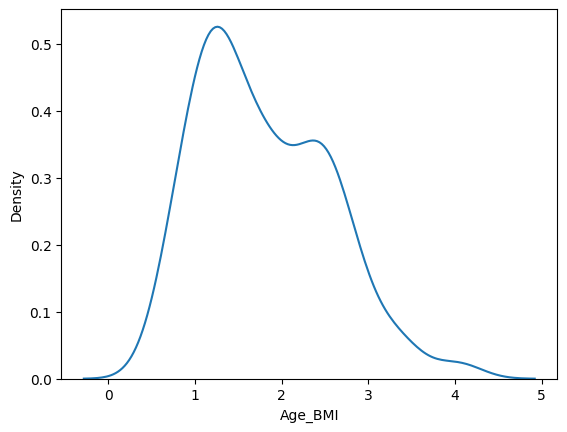

In [21]:
sns.kdeplot(df1['Age_BMI'])

In [22]:
df1['Age_BMI'].describe()

count    200.000000
mean       1.799483
std        0.757491
min        0.505689
25%        1.197125
50%        1.695402
75%        2.401835
max        4.131799
Name: Age_BMI, dtype: float64

<AxesSubplot:xlabel='Colon_Cancer_Type', ylabel='Age_BMI'>

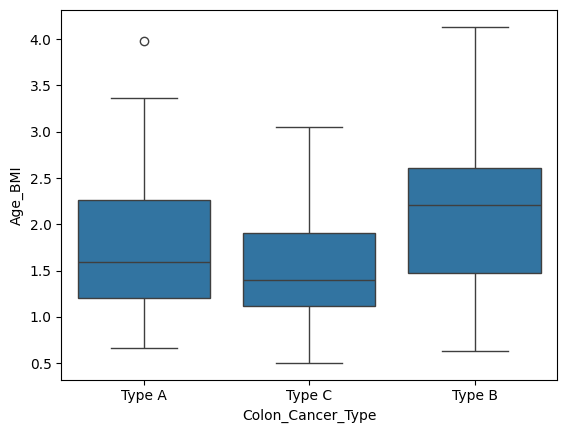

In [23]:
sns.boxplot(x='Colon_Cancer_Type',y='Age_BMI',data=df1)

In [24]:
df1['Exercise_Frequency'].value_counts()

Exercise_Frequency
Rarely          72
Regularly       65
Occasionally    63
Name: count, dtype: int64

In [25]:
# combining age and exercise frequency
exercise_mapping = {
    'Rarely': 1,
    'Regularly': 2,
    'Occasionally': 3
}

df1['Age_Exercise'] = df1['Age'] / (df1['Exercise_Frequency'].map(exercise_mapping))

<AxesSubplot:xlabel='Age_Exercise', ylabel='Density'>

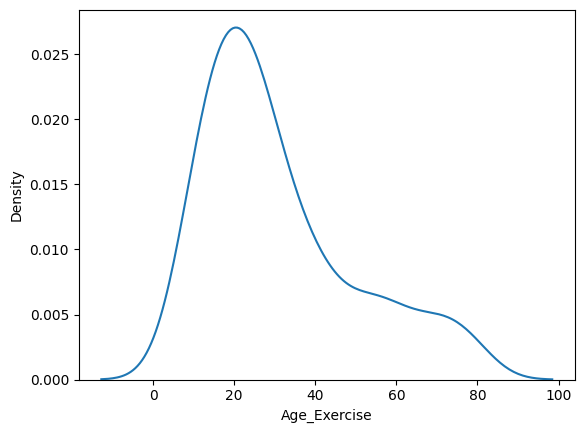

In [26]:
sns.kdeplot(df1['Age_Exercise'])

<AxesSubplot:xlabel='Colon_Cancer_Type', ylabel='Age_Exercise'>

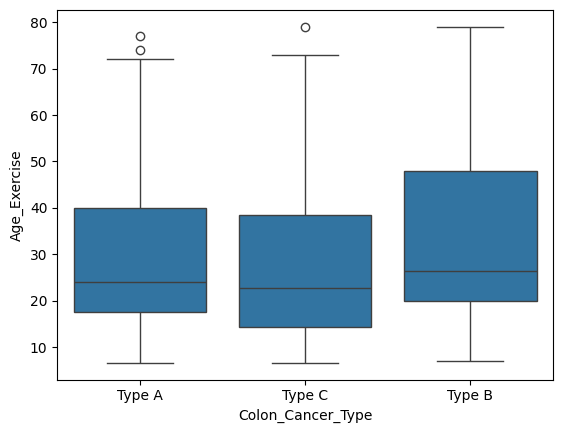

In [27]:
sns.boxplot(x='Colon_Cancer_Type',y='Age_Exercise',data=df1)

In [28]:
df1['Smoking_History'].value_counts()

Smoking_History
Never      99
Former     61
Current    40
Name: count, dtype: int64

In [29]:
smoking_mapping = {
    'Never': 1,
    'Former': 2,
    'Current': 3
}

df1['Exercise_Smoking_Score'] = (df1['Smoking_History'].map(smoking_mapping)) - (df1['Exercise_Frequency'].map(exercise_mapping))

<AxesSubplot:xlabel='Exercise_Smoking_Score', ylabel='count'>

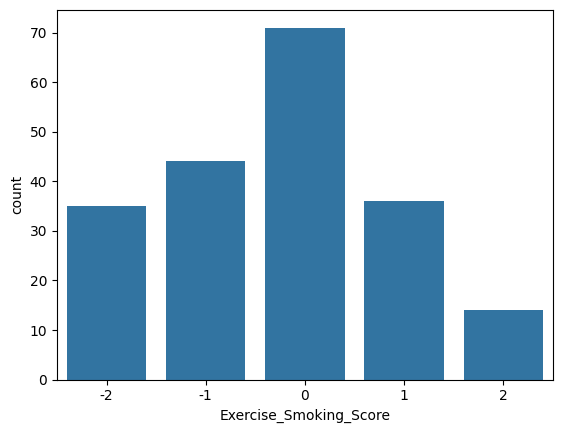

In [30]:
sns.countplot(x='Exercise_Smoking_Score',data=df1)

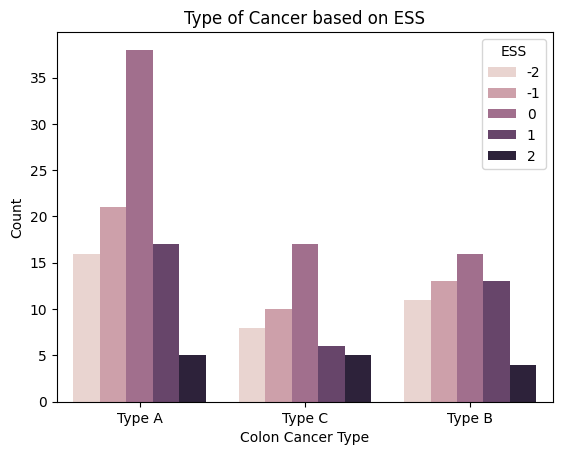

In [31]:
sns.countplot(x='Colon_Cancer_Type', hue='Exercise_Smoking_Score', data=df1)
plt.title('Type of Cancer based on ESS')
plt.xlabel('Colon Cancer Type')
plt.ylabel('Count')
plt.legend(title='ESS', loc='upper right')
plt.show()

<AxesSubplot:xlabel='Colon_Cancer_Type', ylabel='Exercise_Smoking_Score'>

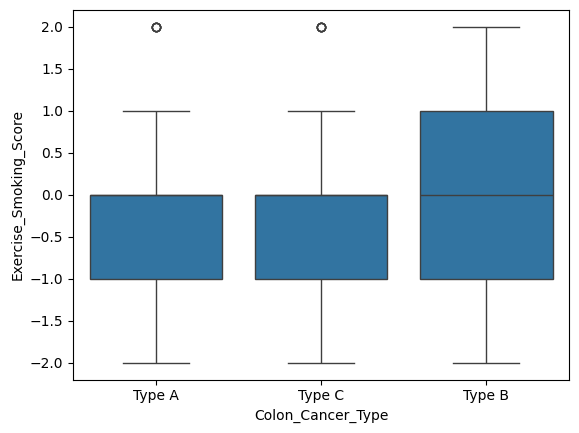

In [32]:
sns.boxplot(x='Colon_Cancer_Type',y='Exercise_Smoking_Score',data=df1)

In [33]:
df1.head()

,Patient_ID,Age,Gender,BMI,Smoking_History,Exercise_Frequency,Chronic_Illness,Colon_Cancer_Type,Age_BMI,Age_Exercise,Exercise_Smoking_Score
0,P1000,58,Male,24.72000,Never,Rarely,No Chronic Illness,Type A,2.346278,58.000000,0
1,P1001,71,Male,28.68000,Current,Rarely,No Chronic Illness,Type C,2.475593,71.000000,2
2,P1002,48,Male,28.31573,Former,Occasionally,No Chronic Illness,Type A,1.695171,16.000000,-1
3,P1003,34,Female,39.88000,Never,Occasionally,Hypertension,Type C,0.852558,11.333333,-2
4,P1004,62,Female,21.87000,Never,Occasionally,No Chronic Illness,Type B,2.834934,20.666667,-2


In [34]:
df1['Chronic_Illness'].value_counts()

Chronic_Illness
No Chronic Illness    115
Diabetes               40
Hypertension           32
Both                   13
Name: count, dtype: int64

In [35]:
gender_mapping = {
    'Male':1,
    'Female':2
}

illness_mapping = {
    'No Chronic Illness':1,
    'Diabetes':2,
    'Hypertension':3,
    'Both':4
}

label_mapping = {   
    'Type A':1,
    'Type B':2,
    'Type C':3
}

df1['Gender'] = df1['Gender'].map(gender_mapping)
df1['Smoking_History'] = df1['Smoking_History'].map(smoking_mapping)
df1['Exercise_Frequency'] = df1['Exercise_Frequency'].map(exercise_mapping)
df1['Chronic_Illness'] = df1['Chronic_Illness'].map(illness_mapping)
df1['Colon_Cancer_Type'] = df1['Colon_Cancer_Type'].map(label_mapping)

In [36]:
df1.head()

,Patient_ID,Age,Gender,BMI,Smoking_History,Exercise_Frequency,Chronic_Illness,Colon_Cancer_Type,Age_BMI,Age_Exercise,Exercise_Smoking_Score
0,P1000,58,1,24.72000,1,1,1,1,2.346278,58.000000,0
1,P1001,71,1,28.68000,3,1,1,3,2.475593,71.000000,2
2,P1002,48,1,28.31573,2,3,1,1,1.695171,16.000000,-1
3,P1003,34,2,39.88000,1,3,3,3,0.852558,11.333333,-2
4,P1004,62,2,21.87000,1,3,1,2,2.834934,20.666667,-2


In [37]:
categorical_features = ['Gender', 'Smoking_History', 'Exercise_Frequency', 
                       'Chronic_Illness', 'Colon_Cancer_Type']

def calculate_cramers_v(x, y):

    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

cat_corr = pd.DataFrame(index=categorical_features, columns=categorical_features)
for i in categorical_features:
    for j in categorical_features:
        cat_corr.loc[i,j] = calculate_cramers_v(df1[i], df1[j])

cat_corr


,Gender,Smoking_History,Exercise_Frequency,Chronic_Illness,Colon_Cancer_Type
Gender,0.989964,0.030987,0.102125,0.098243,0.062252
Smoking_History,0.030987,1.0,0.097574,0.071833,0.072432
Exercise_Frequency,0.102125,0.097574,1.0,0.066423,0.050875
Chronic_Illness,0.098243,0.071833,0.066423,1.0,0.162984
Colon_Cancer_Type,0.062252,0.072432,0.050875,0.162984,1.0


In [38]:
numerical_features = ['Age', 'BMI', 'Age_BMI', 'Age_Exercise', 'Exercise_Smoking_Score' , 'Colon_Cancer_Type']

mixed_corr = pd.DataFrame(index=categorical_features, columns=numerical_features)
for cat in categorical_features:
    for num in numerical_features:
        correlation, _ = spearmanr(df1[cat], df1[num])
        mixed_corr.loc[cat, num] = correlation

mixed_corr

,Age,BMI,Age_BMI,Age_Exercise,Exercise_Smoking_Score,Colon_Cancer_Type
Gender,0.039226,0.109498,-0.029151,0.034361,0.019221,-0.060581
Smoking_History,-0.027604,0.032335,-0.05192,0.002035,0.684188,0.078225
Exercise_Frequency,0.020421,0.101625,-0.021284,-0.759664,-0.733647,0.055945
Chronic_Illness,-0.09518,0.030579,-0.097801,-0.040231,-0.02698,-0.119316
Colon_Cancer_Type,0.039357,0.103819,-0.013655,-0.022322,0.00917,1.0


Text(0.5, 1.0, 'Random Forest Feature Importance')

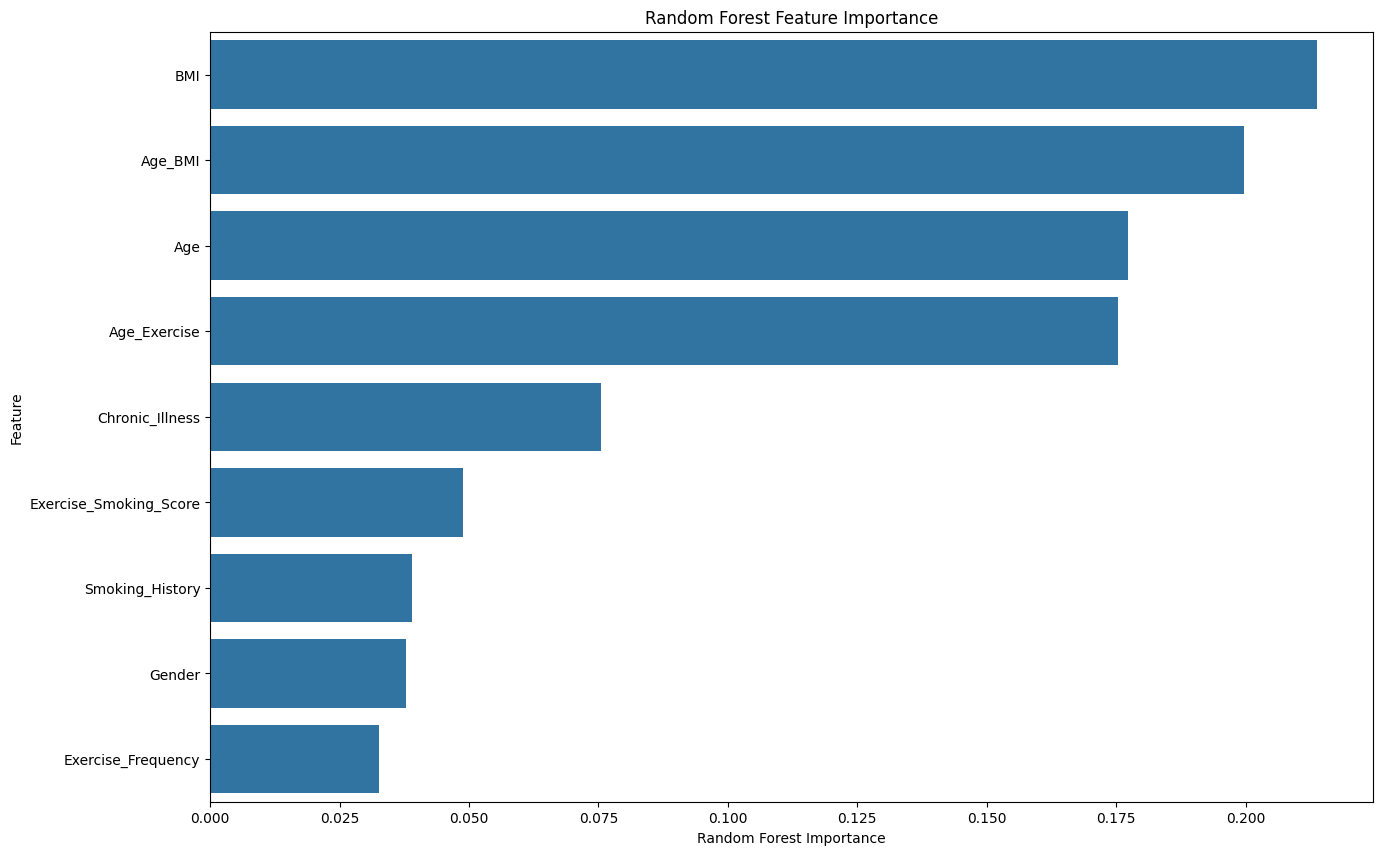

In [39]:
X = df1.drop(['Patient_ID', 'Colon_Cancer_Type'], axis=1)
y = df1['Colon_Cancer_Type']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest Importance': rf.feature_importances_
})
rf_importance = rf_importance.sort_values('Random Forest Importance', ascending=False)


plt.figure(figsize=(15, 10))

sns.barplot(data=rf_importance, x='Random Forest Importance', y='Feature')
plt.title('Random Forest Feature Importance')

In [41]:
reduced_df1 = df1[['Age', 'BMI', 'Age_BMI', 'Age_Exercise', 'Exercise_Smoking_Score' ,'Chronic_Illness', 'Colon_Cancer_Type']]
reduced_df1.to_csv('reduced_df1.csv', index=False) 